<a href="https://maestriasydiplomados.tec.mx/posgrados/maestria-en-inteligencia-artificial-aplicada"><img src="logo_MR4010.png"></a>
<h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# DETECCION DE VEHICULOS CON HOG Y SVM
### www.gti.ssr.upm.es/data/Vehicle_database.html

# Se cargan las bibliotecas necesarias

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog

Matplotlib is building the font cache; this may take a moment.


# Se importan los dos datasets 
### https://docs.python.org/3/library/glob.html

In [12]:
import glob
vehicle = glob.glob("data_svm/vehicles/**/*.png")
#vehicle= glob.glob("data_pedestrian/pedestrian/**/*.jpg")
no_vehicle = glob.glob("data_svm/non-vehicles/**/*.png")

In [13]:
len(vehicle)

3425

In [4]:
len(no_vehicle)

3900

# Se muestra una imagen con vehículo

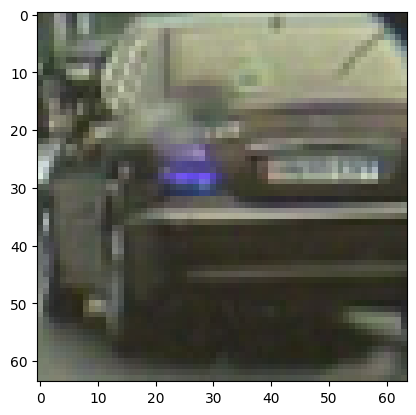

In [5]:
img_color = cv2.imread(vehicle[10])
plt.imshow(img_color)

# Para fines de demostración se calcula el HOG de la imagen

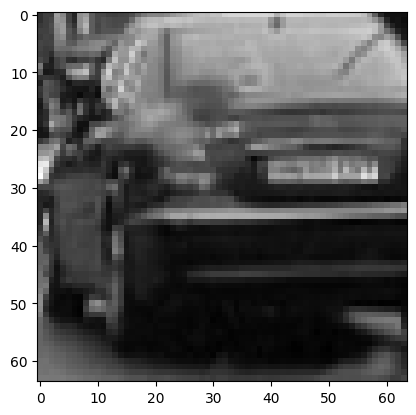

In [6]:
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

In [7]:
features,hog_img = hog(img_gray,
                       orientations = 11,
                       pixels_per_cell = (16,16),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)

In [8]:
features.shape

(396,)

In [9]:
hog_img.shape

(64, 64)

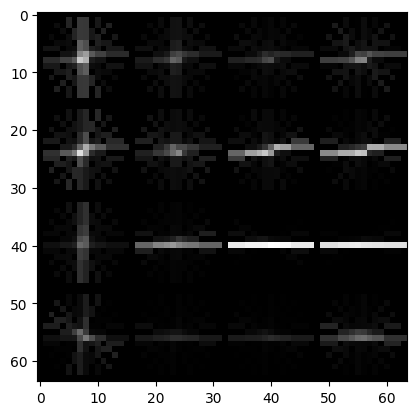

In [10]:
plt.imshow(hog_img,cmap = 'gray')

# Se extraen las features del HOG para ambos tipos de datos

In [11]:
vehicle_hog_accum = []

for i in vehicle:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    vehicle_hog_feature, vehicle_hog_img = hog(img_gray,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    vehicle_hog_accum.append(vehicle_hog_feature)

In [12]:
X_vehicle = np.vstack(vehicle_hog_accum).astype(np.float64)
y_vehicle = np.ones(len(X_vehicle))

In [13]:
X_vehicle.shape

(3425, 396)

In [14]:
y_vehicle.shape

(3425,)

In [22]:
novehicle_hog_accum = []

for i in no_vehicle:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    novehicle_hog_feature, novehicle_hog_img = hog(img_gray,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    novehicle_hog_accum.append(novehicle_hog_feature)

In [24]:
X_novehicle = np.vstack(novehicle_hog_accum).astype(np.float64)
y_novehicle = np.zeros(len(X_novehicle))

In [25]:
X_novehicle.shape

(3900, 396)

In [26]:
y_novehicle.shape

(3900,)

# Se combinan ambos tipos de datos para alimentar el SVM

In [27]:
X = np.vstack((X_vehicle,X_novehicle))
X.shape

(7325, 396)

In [28]:
y = np.hstack((y_vehicle,y_novehicle))
y.shape

(7325,)

# Se generan los datos de entrenamiento y de prueba

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [34]:
X_train.shape

(5127, 396)

In [35]:
X_test.shape

(2198, 396)

# Se importa el Clasificador y se entrena

In [31]:
#from sklearn.svm import LinearSVC

#svc_model = LinearSVC()
#svc_model.fit(X_train, y_train)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [32]:
y_predict = svc_model.predict(X_test)

<AxesSubplot: >

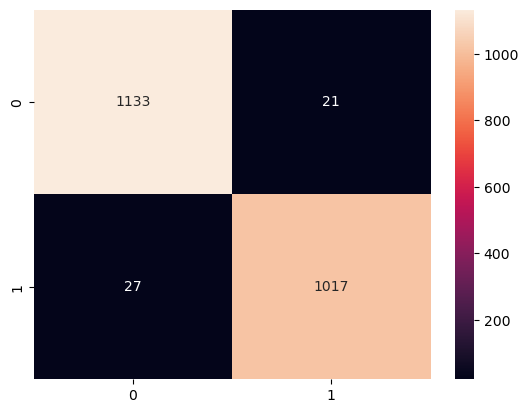

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1154
         1.0       0.98      0.97      0.98      1044

    accuracy                           0.98      2198
   macro avg       0.98      0.98      0.98      2198
weighted avg       0.98      0.98      0.98      2198



# GridSearchCV

In [39]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [40]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.954 total time=   4.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.941 total time=   4.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.931 total time=   4.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   4.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   4.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   2.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   2.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   2.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=   2.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.964 total time=   2.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.928 total time=   5.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [41]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [42]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [43]:
grid_predictions = grid.predict(X_test)

<AxesSubplot: >

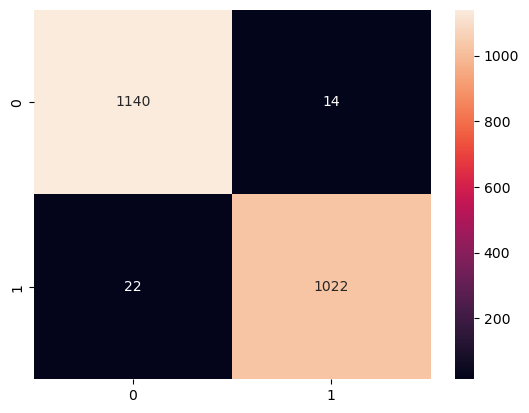

In [44]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [45]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1154
         1.0       0.99      0.98      0.98      1044

    accuracy                           0.98      2198
   macro avg       0.98      0.98      0.98      2198
weighted avg       0.98      0.98      0.98      2198



# Gracias por la atención